# Bank Marketing Data Classification (CatBoost Classifier)
Work by: <a href = 'https://www.linkedin.com/in/louis-widi-anandaputra-90008815a/' target = '_blank'>Louis Widi Anandaputra</a>

<i>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).</i>

<a href = 'https://archive.ics.uci.edu/dataset/222/bank+marketing'>Dataset Source</a>[1]

## Data Pre-Processing and Preparation

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import shap

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## EDA

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
df.select_dtypes(include= 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [7]:
print(df.select_dtypes(include= 'object').columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [8]:
for col in df.columns:
	if type(df[col][0]) is str:
		print('unknown value count in'+col+':'+
		str(df[df[col]=='unknown']['y'].count())
		)

unknown value count injob:330
unknown value count inmarital:80
unknown value count ineducation:1731
unknown value count indefault:8597
unknown value count inhousing:990
unknown value count inloan:990
unknown value count incontact:0
unknown value count inmonth:0
unknown value count inday_of_week:0
unknown value count inpoutcome:0
unknown value count iny:0


In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df["y"].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

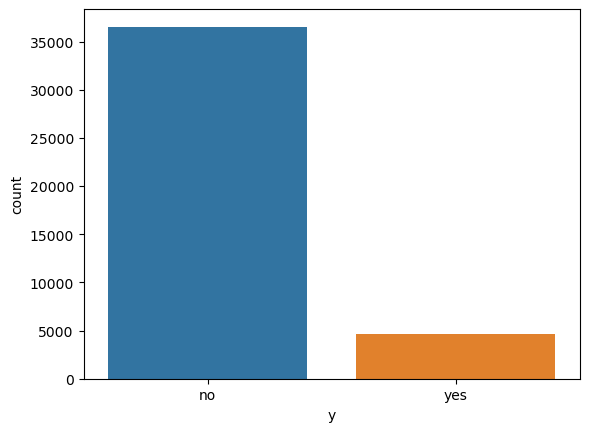

In [11]:
sns.countplot(x=df['y'])

<Axes: xlabel='marital', ylabel='count'>

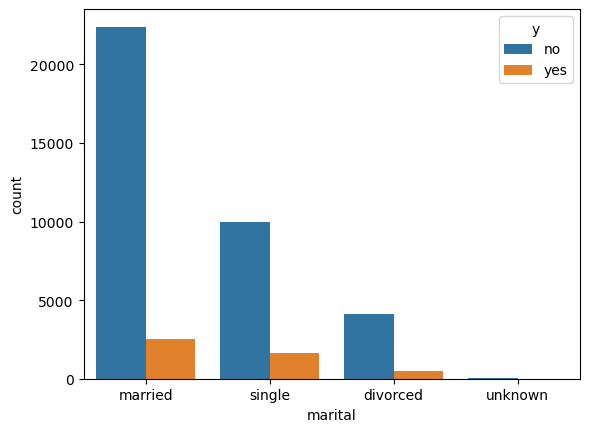

In [12]:
sns.countplot(x = df['marital'], hue = df['y'])

<Axes: >

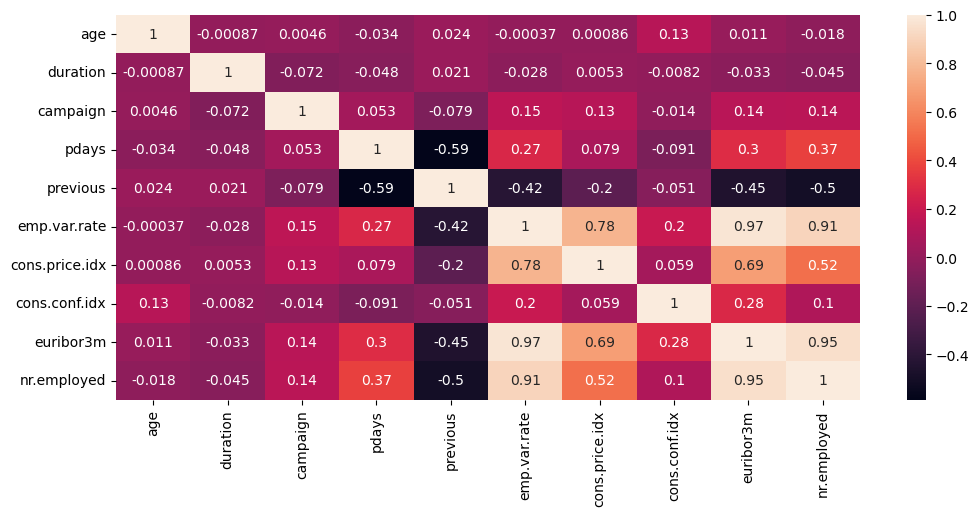

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericdf = df.select_dtypes(include=numerics)
corr_matrix = numericdf.corr()
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix, 
            annot = True
           )

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


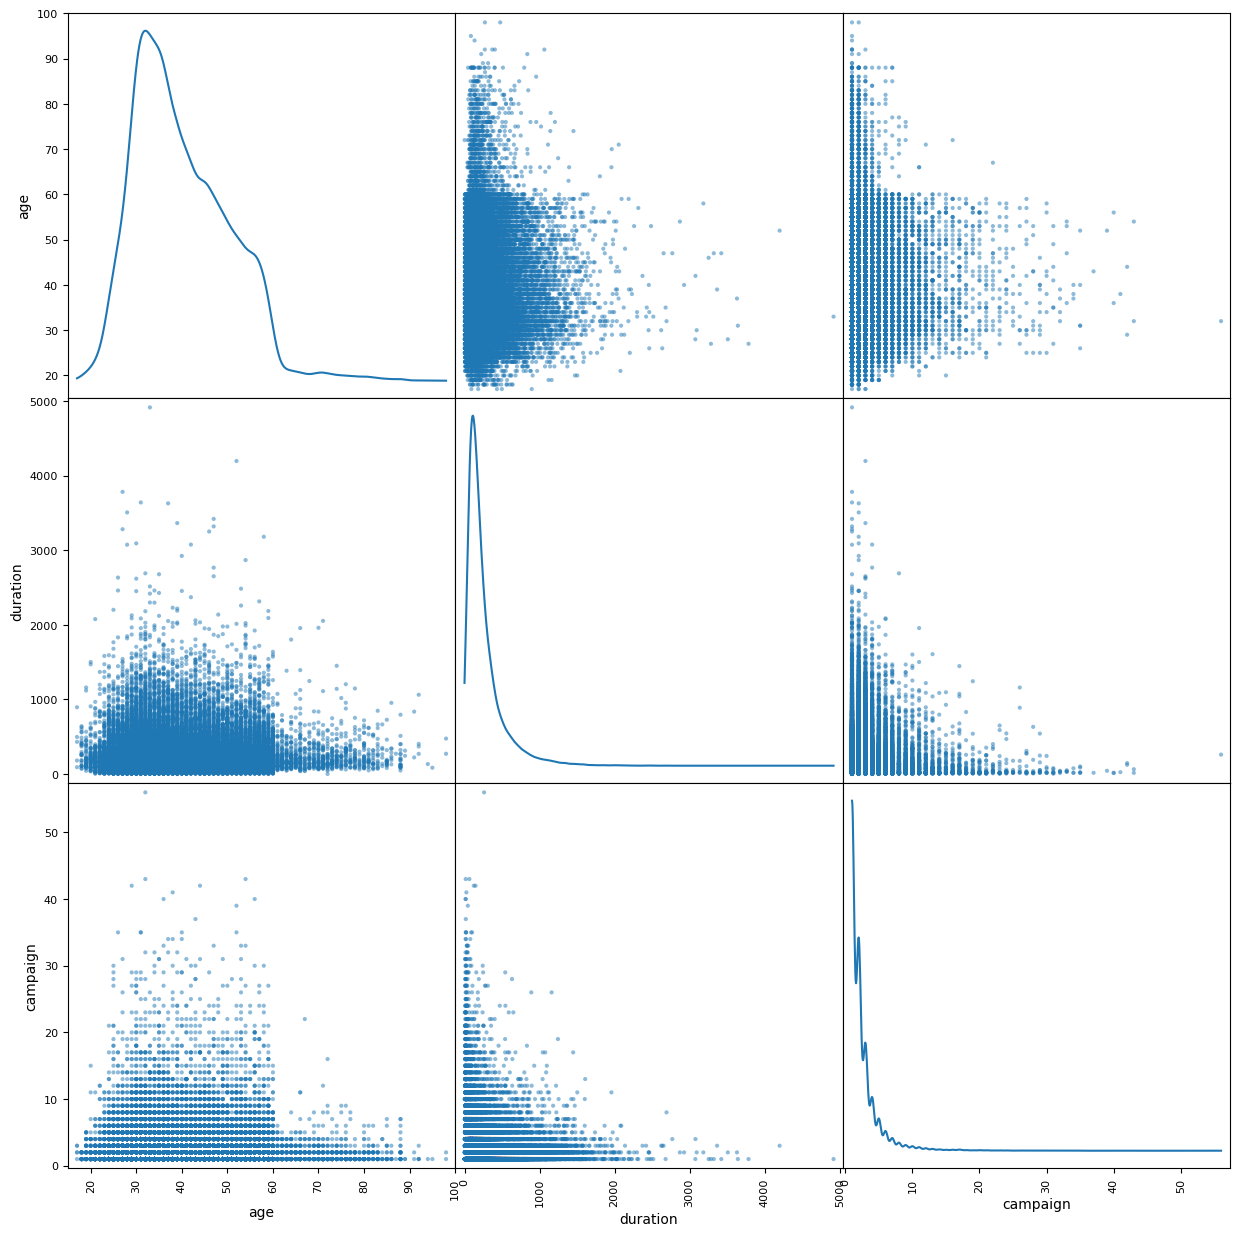

In [14]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde", 
    cmap = 'coolwarm')
plt.show()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


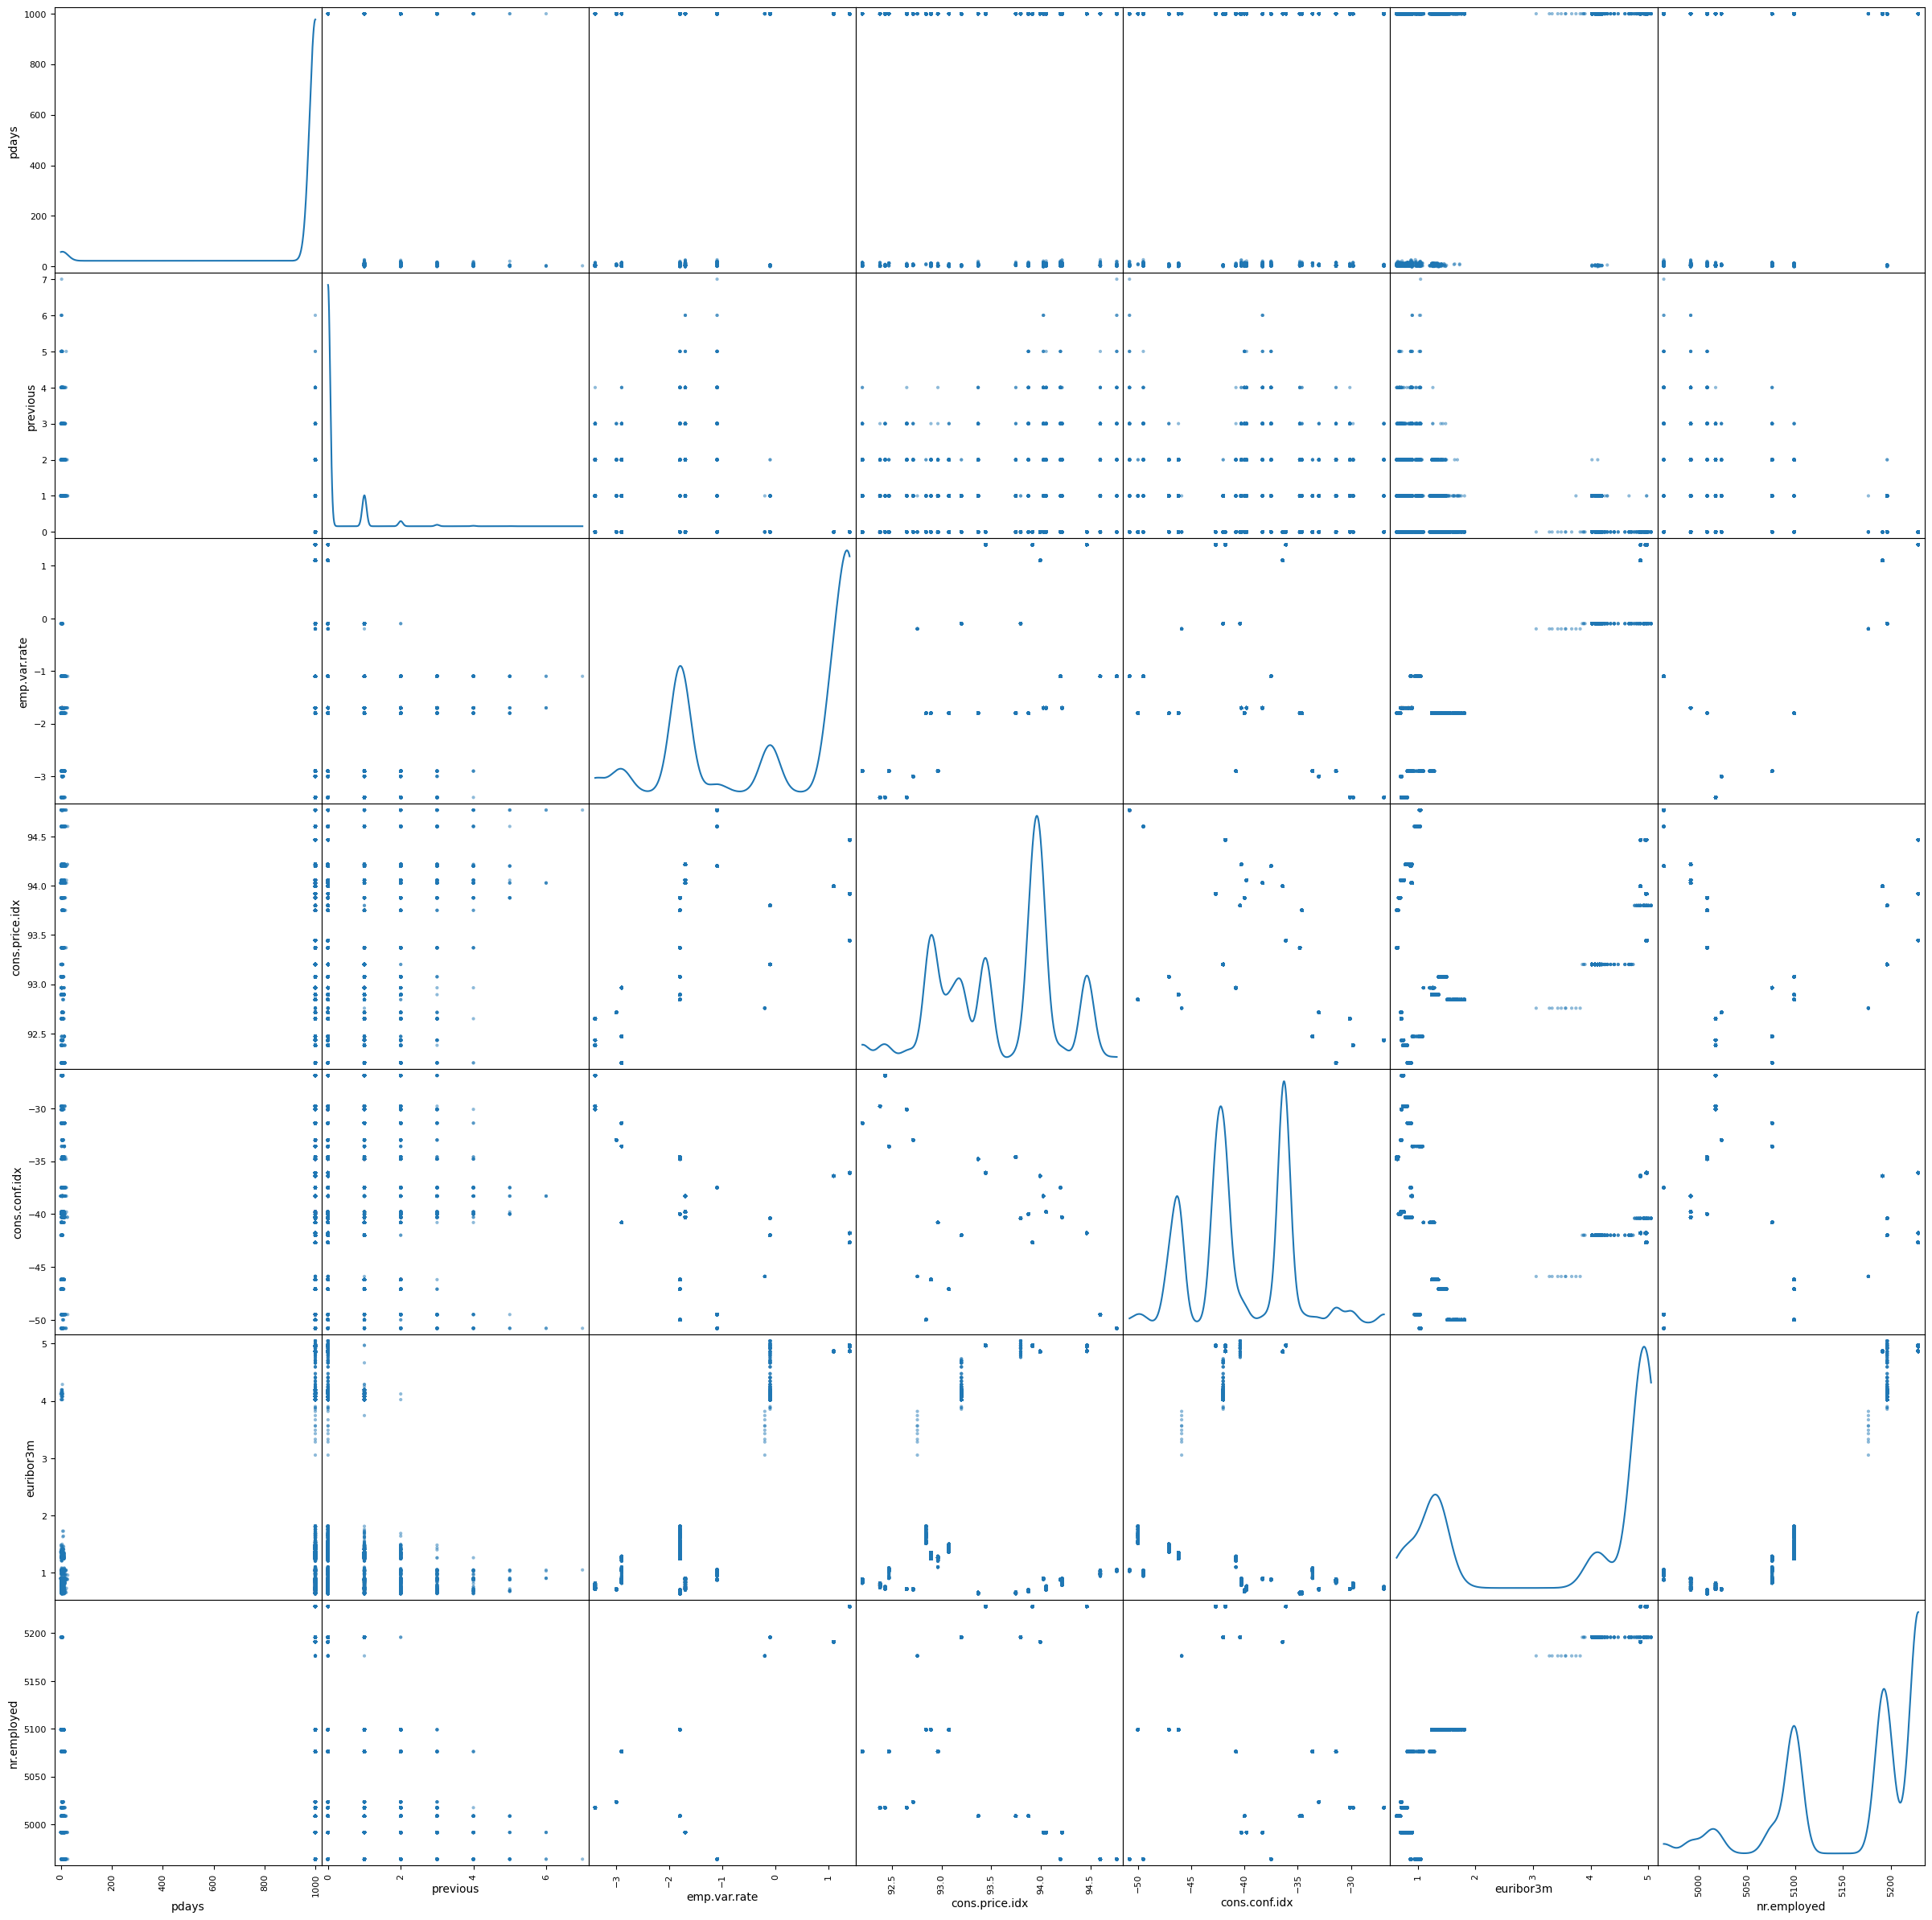

In [15]:
pd.plotting.scatter_matrix(
    df[["pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]],
    figsize = (30, 30),
    diagonal = "kde", 
    cmap = 'coolwarm')
plt.show()

## Modelling

In [16]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [17]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

In [18]:
model_borders = CatBoostClassifier(cat_features=cat_features, simple_ctr='Borders', n_estimators=100, combinations_ctr='Borders')
model_borders.fit(X_train, y_train)

model_buckets = CatBoostClassifier(cat_features=cat_features, simple_ctr='Buckets', n_estimators=100, combinations_ctr='Buckets')
model_buckets.fit(X_train, y_train)

model_target = CatBoostClassifier(cat_features=cat_features, simple_ctr='BinarizedTargetMeanValue', n_estimators=100, combinations_ctr='BinarizedTargetMeanValue')
model_target.fit(X_train, y_train)

model_counter = CatBoostClassifier(cat_features=cat_features, simple_ctr='Counter', n_estimators=100, combinations_ctr='Counter')
model_counter.fit(X_train, y_train)

Learning rate set to 0.378493
0:	learn: 0.3268008	total: 70.8ms	remaining: 7.01s
1:	learn: 0.2333143	total: 82.4ms	remaining: 4.04s
2:	learn: 0.2042808	total: 95.5ms	remaining: 3.09s
3:	learn: 0.1956556	total: 107ms	remaining: 2.57s
4:	learn: 0.1890847	total: 121ms	remaining: 2.29s
5:	learn: 0.1832260	total: 133ms	remaining: 2.08s
6:	learn: 0.1815154	total: 148ms	remaining: 1.96s
7:	learn: 0.1800692	total: 161ms	remaining: 1.85s
8:	learn: 0.1789199	total: 173ms	remaining: 1.75s
9:	learn: 0.1774663	total: 185ms	remaining: 1.66s
10:	learn: 0.1767090	total: 196ms	remaining: 1.59s
11:	learn: 0.1758239	total: 208ms	remaining: 1.53s
12:	learn: 0.1748587	total: 220ms	remaining: 1.47s
13:	learn: 0.1738924	total: 233ms	remaining: 1.43s
14:	learn: 0.1731167	total: 245ms	remaining: 1.39s
15:	learn: 0.1727402	total: 255ms	remaining: 1.34s
16:	learn: 0.1725553	total: 267ms	remaining: 1.3s
17:	learn: 0.1716859	total: 280ms	remaining: 1.27s
18:	learn: 0.1710362	total: 291ms	remaining: 1.24s
19:	learn

## Evaluation

In [19]:
y_borders = model_borders.predict(X_test)
y_buckets = model_buckets.predict(X_test)
y_target = model_target.predict(X_test)
y_counter = model_counter.predict(X_test)

In [20]:
classifaction_borders = classification_report(y_test, y_borders)
print(classifaction_borders)

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [21]:
classifaction_buckets = classification_report(y_test, y_buckets)
print(classifaction_buckets)

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.66      0.55      0.60       935

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



classifaction_target = classification_report(y_test, y_target)
print(classifaction_target)

In [22]:
classifaction_counter = classification_report(y_test, y_counter)
print(classifaction_counter)

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.66      0.55      0.60       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238



Overall, using the counter for combinations_ctr is the best approach for acquiring the best performance

In [23]:
explainer = shap.Explainer(model_counter)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


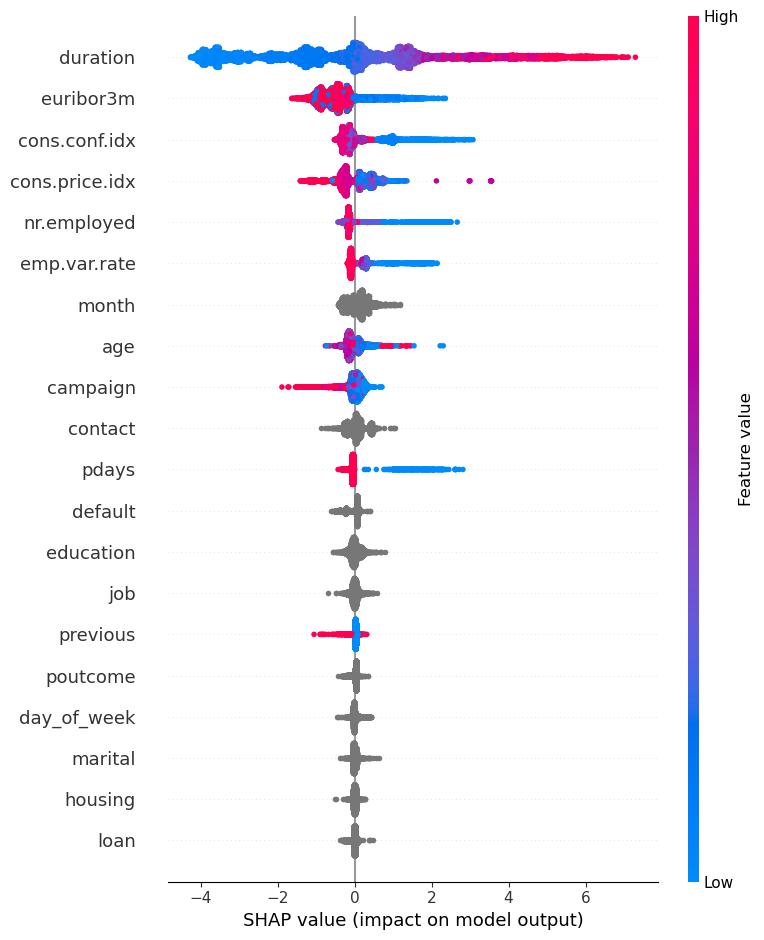

In [24]:
shap.summary_plot(shap_values, X_test)
plt.show()

Duration would present the highest impact on the model's output

## Deployment

In [25]:
model_counter.save_model('models/model_counter_catboost.json',
           format="json")#saving the model

## Reference
[1] Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

© Louis Widi Anandaputra - 2023